# Tasca M6 T01

Exercicis per practicar amb regressions.

Lo primero que hacemos es descargar el dataframe, describimos cada una de las variables y comprobamos que está limpio de nulls, nan y duplicados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/housing data.csv', names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


**Diccionario de terminos:**

- **CRIM**: Tasa de criminalidad per cápita por pueblo
- **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- **INDUS**: Proporción de acres de negocios no minoristas por pueblo
- **CHAS**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
- **NOX**: Concentración de óxidos de nitrógeno (partes por 10 millones)
- **RM**: Número promedio de habitaciones por vivienda
- **AGE**: Proporción de unidades ocupadas por el propietario construidas antes de 1940
- **DIS**: Distancias ponderadas a cinco centros de empleo en Boston
- **RAD**: Índice de accesibilidad a carreteras radiales
- **TAX**: Tasa de impuestos a la propiedad de valor total por 10,000 \$
- **PTRATIO**: Relación alumno-maestro por pueblo
- **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por pueblo
- **LSTAT**: % de estatus más bajo de la población
- **MEDV**: Valor mediano de viviendas ocupadas por el propietario en miles de dólares ($1000)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.duplicated().sum()

0

A continuación hacemos una descripción estadistica de sus variables.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

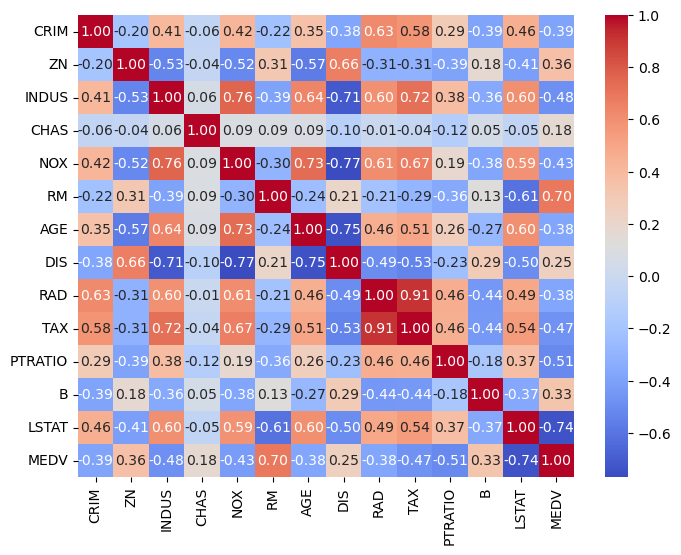

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

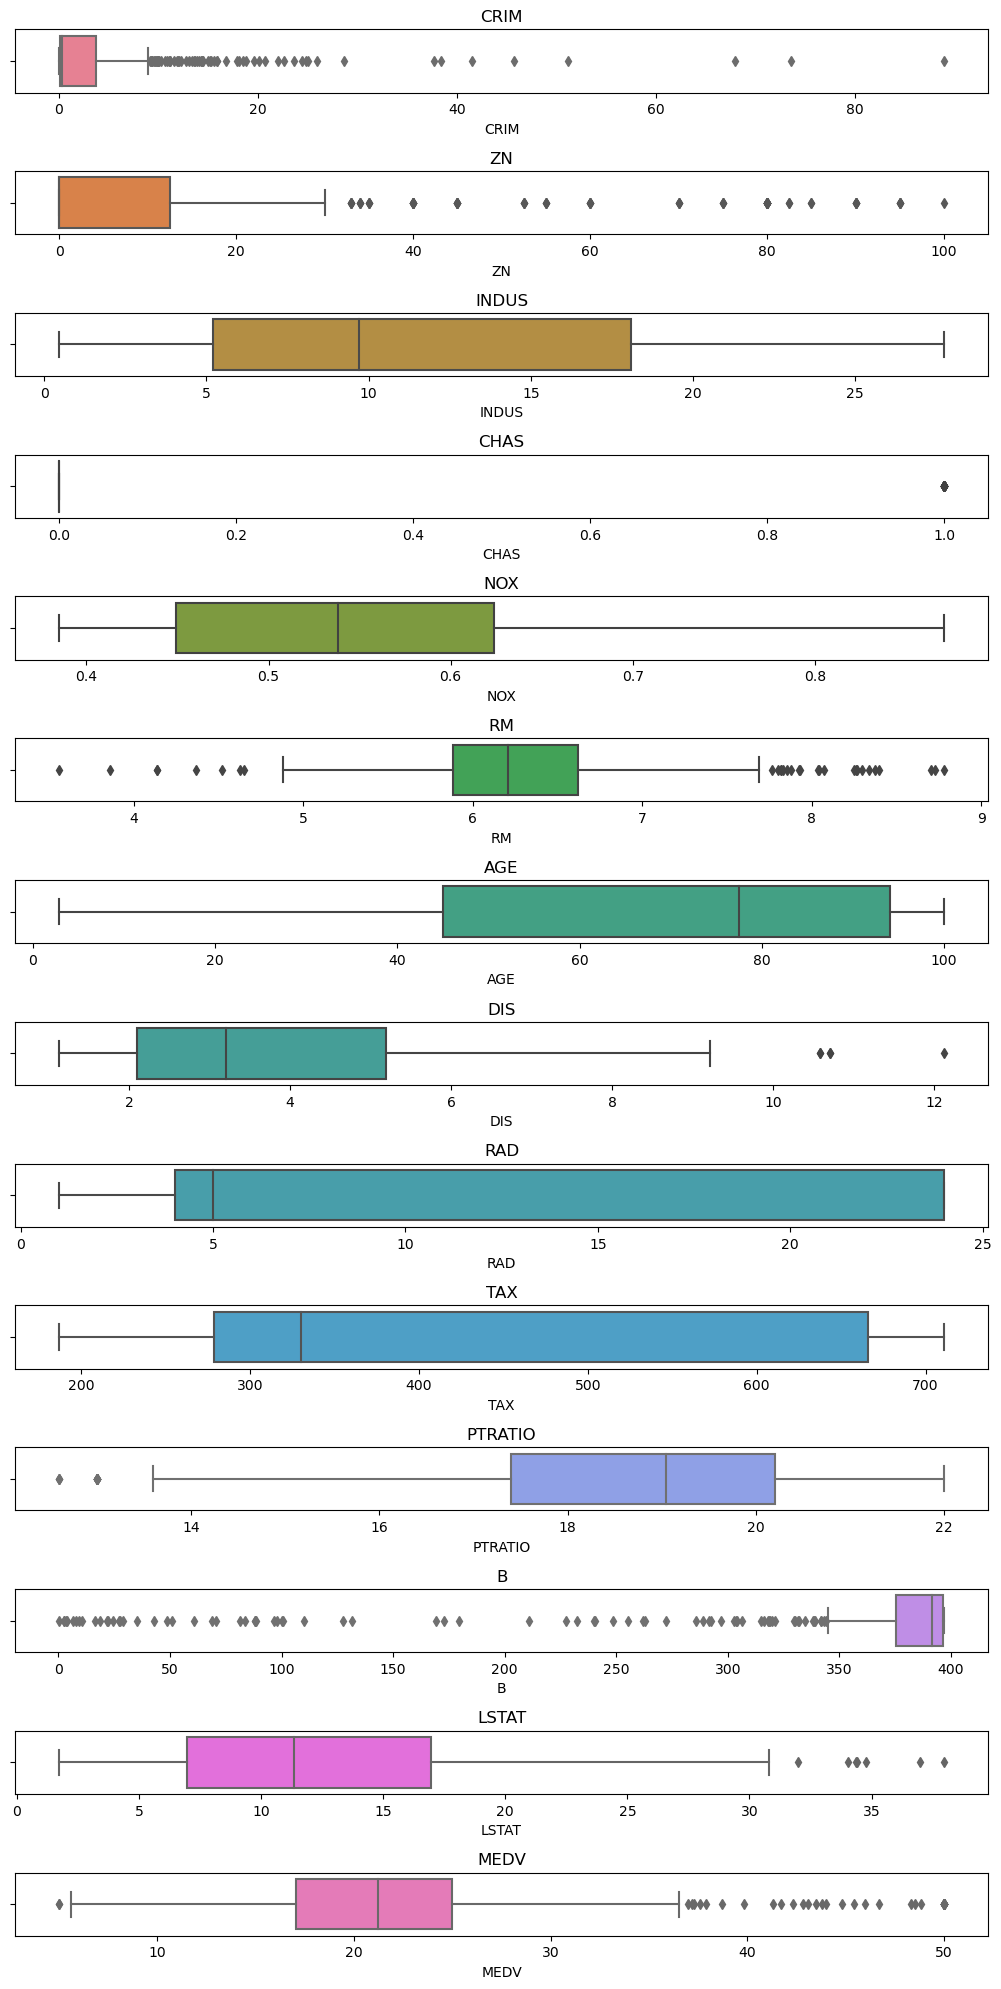

In [8]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Nuestra variable objetivo será 'MDEV', que representa el precio medio de las viviendas. Observamos que esta variable está fuertemente correlacionada con 'RM', el número de habitaciones, y de manera inversa con 'LSTAT', el porcentaje de habitantes de estatus bajo en la zona. Por lo tanto, es previsible que estas sean las variables más influyentes en los modelos de regresión que se nos solicitarán más adelante.

En los boxplots vemos que en algunas variables hay mucha presencia de outliers, esto nos ayudará luego a elegir el modelo de estandarización.

A partir de aquí, comenzamos el proceso de preprocesamiento del DataFrame para una mejor evaluación por parte de los modelos. Empezaremos con la columna 'CHAS', que, como hemos observado, es una variable binaria, y la recategorizaremos.

In [ ]:
df['CHAS'] = df['CHAS'].astype('category')

Ahora crearemos dummies de la columna 'RAD' que como pudimos ver solo toma un cierto número de valores pertenecientes a un índice de accesibilidad a carreteras. Teniendo en cuenta que deberemos dejar fuera una columna para evitar el doblamiento de información.

In [9]:
df = pd.concat([df, pd.get_dummies(df['RAD'], prefix='RAD',drop_first=True)], axis=1).drop(columns=['RAD'])

Después, procederemos a estandarizar las variables, lo que nos permitirá igualar su importancia en el modelo, independientemente de sus magnitudes. Para lograrlo, aplicaremos dos enfoques diferentes:

- Variables sin outliers: Utilizaremos el método MinMaxScaler para ajustar estas variables, escalando sus valores al rango de 0 a 1.

- Variables con valores atípicos: Aplicaremos el método RobustScaler a estas variables. Este método es más resistente a los valores atípicos y, por lo tanto, es adecuado cuando hay valores extremos presentes en las distribuciones.

Es importante destacar que no es necesario que las variables sigan una distribución normal para realizar esta estandarización, ya que ambos métodos mencionados no requieren que las variables cumplan con esta suposición. Además, en el sprint anterior ya hemos evaluado las distribuciones de las variables y confirmado que ninguna sigue una distribución normal.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

variables_minmax = ['INDUS', 'NOX', 'AGE', 'TAX']
minmax_scaler = MinMaxScaler()
df[variables_minmax] = minmax_scaler.fit_transform(df[variables_minmax])

variables_robust = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'PTRATIO']
robust_scaler = RobustScaler()
df[variables_robust] = robust_scaler.fit_transform(df[variables_robust])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.933791,2.392616,-0.069593,-0.048529,-7.697835e-18,0.951471,24.678377
ZN,506.0,0.909091,1.865796,0.000000,0.000000,0.000000e+00,1.000000,8.000000
INDUS,506.0,0.391378,0.251479,0.000000,0.173387,3.383431e-01,0.646628,1.000000
CHAS,506.0,0.069170,0.253994,0.000000,0.000000,0.000000e+00,0.000000,1.000000
NOX,506.0,0.349167,0.238431,0.000000,0.131687,3.148148e-01,0.491770,1.000000
RM,506.0,0.103163,0.952056,-3.587398,-0.437669,0.000000e+00,0.562331,3.484417
AGE,506.0,0.676364,0.289896,0.000000,0.433831,7.682801e-01,0.938980,1.000000
DIS,506.0,0.190267,0.681846,-0.672824,-0.358544,7.199102e-17,0.641456,2.888060
TAX,506.0,0.422208,0.321636,0.000000,0.175573,2.729008e-01,0.914122,1.000000
PTRATIO,506.0,-0.212309,0.773195,-2.303571,-0.589286,0.000000e+00,0.410714,1.053571


Una vez hecho el prepocesamiento del dataset empezamos los ejercicios.

## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


Lo primero separar el dataset en dos partes, una para el entrenamiento y otro para el testeo del modelo. Como es común utilizaremos una proporcion del 80-20 a la hora de hacer el split.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

A continuación declaramos, entranamos y calculamos las predicciones de los 4 modelos que vamos a calcular.

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

Una vez tenemos los modelos vamos a ver gráficamente cuan buenos son.

En esta primera representación tenemos cada una de las observaciones en el eje 'x' y en el eje 'y' tenemos en azul los de y_test y en naranja los valores predicho por el módelo. Viendo directamente la diferencias entre cada uno de los registros.
A primer ojo vemos que en la gráfica de SVR los valores difieren mucho entre predicciones y valores reales, mientras que otros modelos como Random Forest, los valores son realmente muy parecidos quitando algunas excepciones.

Veamos como quedaría distribuido en una nube de puntos.

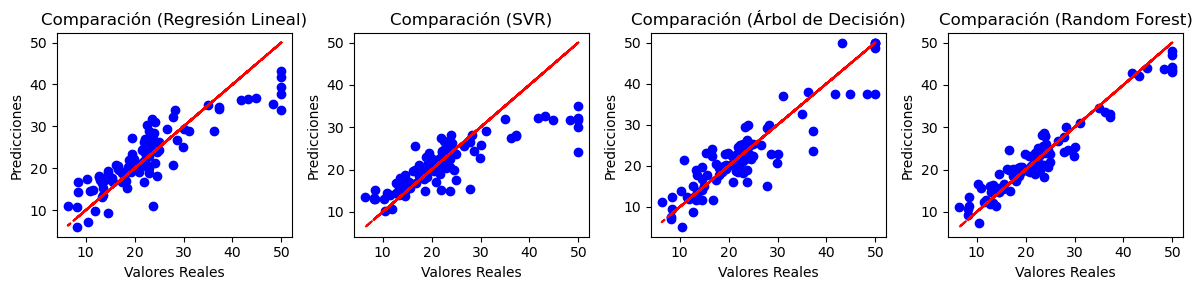

In [15]:
plt.figure(figsize=(15, 3))

for i, pred in enumerate(predicciones):
    plt.subplot(1, 5, i+1)
    plt.scatter(y_test, pred, label=f'Datos reales vs. Predicciones ({nombres_modelos[i]})', color='blue')
    plt.plot(y_test, y_test, color='red', label='Línea de Regresión', linestyle='--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Comparación ({nombres_modelos[i]})')
    
plt.tight_layout()

En este otro gráfico tenemos en el eje x los valores reales (y_test) y en el eje de las y los valores predichos por el modelo usando los valores de testeo (X_test). Por lo tanto cuanto mas cercano esten los puntos a la diagonal (x=y) mas preciso será el modelo. Como ya vimos anteriormente, los puntos en SVR estan mucho mas dispersos que en los otros, mientras que en el Random Forest, quitado un par de punto, se ajusta bastante bien a la línea.

Una última visión de los resultados de los modelos, en este caso miraremos las diferencias de residuos.

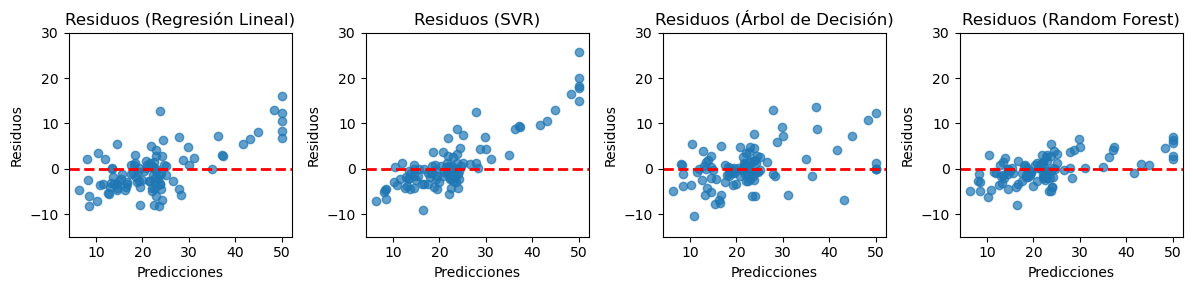

In [16]:
plt.figure(figsize=(15, 3))

for i, pred in enumerate(predicciones):
    residuos = y_test - pred
    plt.subplot(1, 5, i+1)
    plt.scatter(y_test, residuos, label=f'Residuos ({nombres_modelos[i]})', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Línea Base')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.title(f'Residuos ({nombres_modelos[i]})')
    plt.ylim(-15,30)

plt.tight_layout()

En esta gráfica los puntos deberian estar los más cercanos posible al 0, lo cual querría decir que no existen diferencia entre la predicción y los valores reales. De nuevo se ve claramente que Random Forest es bastante preciso, mientras que en SVR observamos varios puntos que se alejan del 0.

## Exercici 2
Compara’ls en base al MSE i al R2.

En este ejercicio nos piden que comparamos los modelos en base al:
- Error cuadrático medio (**MSE**) el cual calcula la media de los cuadrados de las diferencias entre los valores reales y las predicciones. Un valor bajo de MSE indica un modelo más preciso.
- Coeficiente de Determinación (**R^2**) el cual mide la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente. R^2 varía entre 0 y 1, y un valor más cercano a 1 indica un modelo más preciso.

De forma que podremos saber cuan acertados hemos estado en las conjeturas que hicimos en el ejercicio 1.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

data = {'MODELO': [], 'R^2': [], 'MSE': []}

for i, pred in enumerate(predicciones):
    data['MODELO'].append(nombres_modelos[i])
    data['R^2'].append(r2_score(y_test, pred).round(5))
    data['MSE'].append(mean_squared_error(y_test, pred).round(5))
    
df = pd.DataFrame(data)
df

,MODELO,R^2,MSE
0,Regresión Lineal,0.76373,23.34984
1,SVR,0.60865,38.67578
2,Árbol de Decisión,0.80963,18.81412
3,Random Forest,0.91540,8.36033


Como ya adelantamos viendo las gráficas el modelo mas preciso ha sido Random Forest con unos valores de rendimiento muy satisfactorios. Le sigue un poco de lejos la regresión de árbol de decisión y la regresión lineal, con valores similares entre ellos. Por otro lado, SVR se queda considerablemente rezagado en comparación con los otros modelos, mostrando un desempeño notablemente inferior.

Concluimos pues, que en caso de tener que hacer predicciones con un modelo en este caso nos quedaríamos con **Random Forest**.

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Lo primero que haremos será crear un diccionario con los modelos y algunos de sus parametros mas importante con diferentes valores entre los que GridSearchCV buscará los mejores. 

In [18]:
modelos_bp = {
    'Regresión Lineal': {
        'modelo': LinearRegression(),
        'parametros': {'copy_X': (True, False), 'fit_intercept': (True, False), 'n_jobs': (-1, None, 1), 'positive': (True, False)}
    },
    'SVR': {
        'modelo': SVR(),
        'parametros': {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
    },
    'Árbol de Decisión': {
        'modelo': DecisionTreeRegressor(),
        'parametros': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    },
    'Random Forest': {
        'modelo': RandomForestRegressor(),
        'parametros': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

Ahora utilizaremos GridSearchCV en el 'X' e 'y' para decidir cuales de los anteriores parametros nos da mejores resultados en el conjunto total de los datos. En este caso hemos pedido que nos los puntue por MSE, pero lo podríamos haber hecho de igual modo con el R^2. De cada modelo mostraremos los mejores parametros y compararemos el MSE y el R2 con los iniciales para saber si el modelo ha mejorado o empeorado.

In [19]:
from sklearn.model_selection import GridSearchCV

for nombre_modelo, config_modelo in modelos_bp.items():
    modelo_bp = config_modelo['modelo']
    parametros = config_modelo['parametros']

    grid_search = GridSearchCV(modelo_bp, parametros, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    
    print(f"Mejores parámetros para {nombre_modelo}: {grid_search.best_params_}")
    print(f"Mejores estimadores para {nombre_modelo}: {grid_search.best_estimator_}")

    
    mejor_modelo = grid_search.best_estimator_
    mejor_modelo.fit(X_train, y_train)
    y_pred_bp = mejor_modelo.predict(X_test)

    mse_bp = mean_squared_error(y_test, y_pred_bp).round(5)
    r2_bp = r2_score(y_test, y_pred_bp).round(5)
    df.loc[df['MODELO'] == nombre_modelo, 'R^2_BP'] = r2_bp
    df.loc[df['MODELO'] == nombre_modelo, 'MSE_BP'] = mse_bp
    mse = df.loc[df['MODELO'] == nombre_modelo, 'MSE'].values[0]
    r2 = df.loc[df['MODELO'] == nombre_modelo, 'R^2'].values[0]
    
    print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) inicial: {mse}")
    if mse >= mse_bp:
        print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) B.P.: \033[94m{mse_bp}\033[0m")
    else:
        print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) B.P.: \033[91m{mse_bp}\033[0m")
    
    print(f"{nombre_modelo} - Coeficiente de Determinación (R^2) inicial: {r2}")
    if r2 <= r2_bp:
        print(f"{nombre_modelo} - Coeficiente de Determinación (R2) B.P.: \033[94m{r2_bp}\033[0m\n")
    else:
        print(f"{nombre_modelo} - Coeficiente de Determinación (R2) B.P.: \033[91m{r2_bp}\033[0m\n")   

Mejores parámetros para Regresión Lineal: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Mejores estimadores para Regresión Lineal: LinearRegression(n_jobs=-1)
Regresión Lineal - Error Cuadrático Medio (MSE) inicial: 23.34984
Regresión Lineal - Error Cuadrático Medio (MSE) B.P.: 23.34984
Regresión Lineal - Coeficiente de Determinación (R^2) inicial: 0.76373
Regresión Lineal - Coeficiente de Determinación (R2) B.P.: 0.76373

Mejores parámetros para SVR: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
Mejores estimadores para SVR: SVR(C=100, epsilon=0.5)
SVR - Error Cuadrático Medio (MSE) inicial: 38.67578
SVR - Error Cuadrático Medio (MSE) B.P.: 10.41388
SVR - Coeficiente de Determinación (R^2) inicial: 0.60865
SVR - Coeficiente de Determinación (R2) B.P.: 0.89463

Mejores parámetros para Árbol de Decisión: {'max_depth': 30, 'min_samples_split': 10}
Mejores estimadores para Árbol de Decisión: DecisionTreeRegressor(max_depth=30, min_samples_split=10)
Árbol de Decisi

De los resultados obtenidos podemos decir que los parametros por defecto de la Regresión lineal son los mejores puesto que tanto el MSE como el R2 se han mantenido exactamente iguales.

En el caso de SVR, se aprecia una mejora sustancial en el modelo, lo que subraya la importancia de dedicar tiempo a la búsqueda de los mejores parámetros para optimizar la calidad del modelo.

En el modelo de Árbol de Decisión, se observa una ligera mejora, lo que sugiere una mejoría en el rendimiento del modelo. 

En cuanto al modelo Random Forest, se observa una ligera disminución en el rendimiento. Esto podría deberse a que, entre las opciones de parámetros proporcionadas, no se encontraba la configuración óptima, mientras que los valores por defecto parecen ser más adecuados.

Igualmente concluimos que el mejor modelo con mejores parametros continua siendo **Random Forest**, pero esta vez seguido muy de cerca del SVR.

## Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

Para hacer el Cross validation, primero creo un diccionario con los mejores estimadores que conseguimos en el apartado previo y asi poder comparar los resultados que obtendremos con los anteriores.

In [20]:
modelos_cv = {
    'Regresión Lineal': {
        'modelo': LinearRegression(),
        'hiperparametros': {'n_jobs': -1}
    },
    'SVR': {
        'modelo': SVR(),
        'hiperparametros': {'C': 100, 'epsilon': 1}
    },
    'Árbol de Decisión': {
        'modelo': DecisionTreeRegressor(),
        'hiperparametros': {'max_depth': 10, 'min_samples_split': 5}
    },
    'Random Forest': {
        'modelo': RandomForestRegressor(),
        'hiperparametros': {'max_depth': 20, 'n_estimators': 50}
    }
}

Ahora simplemente iteramos en cada modelo con sus mejores estimadores y calculamos el R^2 y MSE para cada uno de los modelos de la media de los diferentes folds, en este caso 5, que hará en X_train el cross validation.

In [21]:
from sklearn.model_selection import cross_val_predict

for nombre_modelo, info_modelo in modelos_cv.items():
    modelo = info_modelo['modelo']
    hiperparametros = info_modelo['hiperparametros']

    y_pred_cv = cross_val_predict(modelo, X_train, y_train, cv=5)
    mse_cv = mean_squared_error(y_train, y_pred_cv)
    r2_cv = r2_score(y_train, y_pred_cv)
    mse = df.loc[df['MODELO'] == nombre_modelo, 'MSE_BP'].values[0]
    r2 = df.loc[df['MODELO'] == nombre_modelo, 'R^2_BP'].values[0]

    print(f"{nombre_modelo} - (MSE) con mejores parametros : {mse}")
    if mse >= mse_cv:
        print(f"{nombre_modelo} - (MSE) con Cross validation: \033[94m{mse_cv}\033[0m")
    else:
        print(f"{nombre_modelo} - (MSE) con Cross validation: \033[91m{mse_cv}\033[0m")
    
    print(f"{nombre_modelo} - (R^2) con mejores parametros: {r2}")
    if r2 <= r2_cv:
        print(f"{nombre_modelo} - (R^2) con Cross validation: \033[94m{r2_cv}\033[0m\n")
    else:
        print(f"{nombre_modelo} - (R^2) con Cross validation: \033[91m{r2_cv}\033[0m\n")

Regresión Lineal - (MSE) con mejores parametros : 23.34984
Regresión Lineal - (MSE) con Cross validation: 23.513323058491284
Regresión Lineal - (R^2) con mejores parametros: 0.76373
Regresión Lineal - (R^2) con Cross validation: 0.7089264676045883

SVR - (MSE) con mejores parametros : 10.41388
SVR - (MSE) con Cross validation: 34.52822524008015
SVR - (R^2) con mejores parametros: 0.89463
SVR - (R^2) con Cross validation: 0.5725720068161473

Árbol de Decisión - (MSE) con mejores parametros : 14.95946
Árbol de Decisión - (MSE) con Cross validation: 18.019257425742577
Árbol de Decisión - (R^2) con mejores parametros: 0.84863
Árbol de Decisión - (R^2) con Cross validation: 0.7769379982146309

Random Forest - (MSE) con mejores parametros : 8.53963
Random Forest - (MSE) con Cross validation: 10.792240492574255
Random Forest - (R^2) con mejores parametros: 0.91359
Random Forest - (R^2) con Cross validation: 0.8664018882052502



El resultado es notable: todos los modelos muestran un deterioro en su desempeño al utilizar la validación cruzada. En particular, el modelo SVR experimenta una disminución significativa, revirtiendo los avances logrados al ajustar los mejores parámetros, y quedando por debajo de sus valores iniciales. Estas variaciones en el rendimiento pueden explicarse por diversas razones:

Falta de datos: Si la muestra de datos es limitada y la división en "folds" en la validación cruzada reduce aún más el tamaño de los conjuntos de entrenamiento y prueba, es posible que los modelos carezcan de suficientes datos para aprender patrones de manera efectiva.

Comportamiento irregular del modelo: Algunos modelos son altamente sensibles a la aleatoriedad introducida por la validación cruzada, lo que puede dar como resultado resultados inconsistentes.

Calidad de los datos: La presencia de valores atípicos u otros problemas en la calidad de los datos puede ser más evidente en la validación cruzada en comparación con una sola división de entrenamiento/prueba.

Overfitting: La elección de los mejores parámetros puede haber llevado al sobreajuste del modelo a los datos de entrenamiento específicos. La validación cruzada es útil para detectar el sobreajuste y prevenirlo. Parece muy claro que es lo que ha pasado con SVR.

En resumen, aunque el modelo Random Forest sigue siendo el más destacado, su ventaja radica no solo en sus valores de desempeño, sino también en su consistencia a través de las diferentes pruebas. Además, se destaca la importancia de contar con un conjunto de datos más extenso para evitar el sobreajuste y reducir la influencia de valores atípicos en la validación cruzada.


## Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Si recordamos la matriz de correlaciones entre las variables, notamos que nuestra variable dependiente 'MDEV' tiene una correlación significativa de 0.7 con el número de habitaciones 'RM'. Esta correlación sugiere que 'RM' es una de las variables más influyentes en la predicción de 'MDEV'. Por lo tanto, podríamos pensar que eliminar 'RM' del conjunto de datos podría resultar en un rendimiento inferior en nuestros modelos de regresión. Veamos si esta suposición es cierta.

In [22]:
X_train_sin_RM = X_train.drop('RM', axis=1)
X_test_sin_RM = X_test.drop('RM', axis=1)

modelos = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for nombre_modelo, modelo in modelos.items():
    modelo.fit(X_train_sin_RM, y_train)
    y_pred_RM = modelo.predict(X_test_sin_RM)
    mse_RM = mean_squared_error(y_test, y_pred_RM)
    r2_RM = r2_score(y_test, y_pred_RM)
    mse = df.loc[df['MODELO'] == nombre_modelo, 'MSE'].values[0]
    r2 = df.loc[df['MODELO'] == nombre_modelo, 'R^2'].values[0]
   
    print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) inicial: {mse}")
    if mse >= mse_RM:
        print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) CV.: \033[94m{mse_RM}\033[0m")
    else:
        print(f"{nombre_modelo} - Error Cuadrático Medio (MSE) CV.: \033[91m{mse_RM}\033[0m")
    
    print(f"{nombre_modelo} - Coeficiente de Determinación (R^2) inicial: {r2}")
    if r2 <= r2_RM:
        print(f"{nombre_modelo} - Coeficiente de Determinación (R2) CV.: \033[94m{r2_RM}\033[0m\n")
    else:
        print(f"{nombre_modelo} - Coeficiente de Determinación (R2) CV.: \033[91m{r2_RM}\033[0m\n")

Regresión Lineal - Error Cuadrático Medio (MSE) inicial: 23.34984
Regresión Lineal - Error Cuadrático Medio (MSE) CV.: 31.671035254394855
Regresión Lineal - Coeficiente de Determinación (R^2) inicial: 0.76373
Regresión Lineal - Coeficiente de Determinación (R2) CV.: 0.679531803625936

SVR - Error Cuadrático Medio (MSE) inicial: 38.67578
SVR - Error Cuadrático Medio (MSE) CV.: 59.09236297673849
SVR - Coeficiente de Determinación (R^2) inicial: 0.60865
SVR - Coeficiente de Determinación (R2) CV.: 0.4020649205014837

Árbol de Decisión - Error Cuadrático Medio (MSE) inicial: 18.81412
Árbol de Decisión - Error Cuadrático Medio (MSE) CV.: 35.85892156862746
Árbol de Decisión - Coeficiente de Determinación (R^2) inicial: 0.80963
Árbol de Decisión - Coeficiente de Determinación (R2) CV.: 0.6371560377893737

Random Forest - Error Cuadrático Medio (MSE) inicial: 8.36033
Random Forest - Error Cuadrático Medio (MSE) CV.: 15.801084313725502
Random Forest - Coeficiente de Determinación (R^2) inicial:

Es cierto, todos los modelos arrojan resultados menos satisfactorios después de la eliminación de la columna con alta correlación. Esto es coherente, ya que al quitar esta columna, se pierde información valiosa y esencial para la predicción del objetivo. En consecuencia, el modelo experimenta una disminución en su capacidad para capturar esta información relevante. En términos simples, el modelo se queda con menos conocimiento para realizar predicciones precisas.

Sin embargo, Random Forest continúa entregando resultados significativos, consolidándose como el claro ganador dentro de los diferentes modelos de regresión probados en este conjunto de datos.